In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('./Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

X = (X-X.mean(axis=0)) / X.std(axis=0)

In [4]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split].reshape(-1,1)

X_test = X[:split]
y_test = y[:split].reshape(-1,1)

Our problem has 3 features > so  
num = num of estimators  
population > num * 3  
W > num * 3  
X > 320 * 3 
We want to know how each estimator predicts this 320 row 
Z = X.WT > 320*num  
y > 320 * 1  

We can be defined by us > W[0] regularization coefficient > can't be less than 0.1 in the mutation function

In [5]:
# We want to write logistic regression by ourselves
def sigmoid(z):
    return 1/(1+np.exp(-z))

# fitness: how we calcualte the loss 
# W is 2d > weight of all of the samples
def fitness_function(W):
    # len(w.shape)==3 > W=3 > one estimator/sample 
    if len(W.shape) == 1:
        W = W.reshape(1,-1)
    global X_train, y_train
    z = np.dot(X_train, W.T)
    h = sigmoid(z)
    CE = -y_train * np.log(h) - (1-y_train) * np.log(1-h)
    # return a number
    return np.mean(CE, axis=0)

In [19]:
def parent_selection(fitness):
    selection_prob = fitness / np.sum(fitness)
    idx = np.arange(fitness.shape[0])
    parent_idx = np.random.choice(idx, size=fitness.shape[0], p=selection_prob)
    return parent_idx

def crossover(parents):
    offsprings = parents.copy() #1000*10
    # 0, 2, 4, ... > [0,1]-[2,3]
    for i in range(0,parents.shape[0],2):
        # crossover parent[i], parent[i+1]
        mask = np.random.randint(0,2,size=parents.shape[1]) #binary array 10*1
        offsprings[i, mask==1] = parents[i+1, mask==1]
        offsprings[i+1, mask==1] = parents[i, mask==1]
    return offsprings

def mutation(offsprings):
    mask = np.random.random(size=offsprings.shape) > 0.3 #T/F
    new_values = np.random.random(size=offsprings.shape) * 2 - 1
    
    offsprings[mask==1] = new_values[mask==1]

    return offsprings

In [20]:
# I want to guide the population to the min point
population = np.random.random(size=(1000, 3)) * 2 - 1 #-1,1

best_fitness = []
mean_fitness = []

for i in range(50):
    # y out must be min > near to 0 [min func]
    error = fitness_function(population)
    # genetic algo can give more than one good answer
    # the answers must differ > if same > the algo converge so not desired
    print(error.min(), error.mean(), error.max()) 
    best_fitness.append(error.min())
    mean_fitness.append(error.mean())
    # fitness must be positive: err<20
    fitness = 2 - error

    parent_idx = parent_selection(fitness)
    parents = population[parent_idx]
    # now each 2 items are the chromosomes

    offsprings = crossover(parents)
    offsprings = mutation(offsprings)

    # mean is contant so it is not desired
    population = np.vstack((population, offsprings))
    # sort base on the ackley output 
    population = np.array(sorted(population, key=fitness_function))[:1000]

0.4598594086578339 0.806483900786988 1.4221654996425521
0.4571541173994894 0.6254468721756274 0.7684190017616733
0.4571541173994894 0.5714473742672275 0.6581737207456214
0.4571541173994894 0.542617364637391 0.6034924039289458
0.4571541173994894 0.5252714842346289 0.5715798623434675
0.4571541173994894 0.5132199192066643 0.5501392443782189
0.4555705674493774 0.5046792014873418 0.5370047929388291
0.45480407240782306 0.49800867157809714 0.527138447889595
0.45480407240782306 0.49307981524837424 0.5176546244051281
0.45480407240782306 0.4885917046681767 0.5098929076827918
0.45480407240782306 0.48552178714022054 0.5052670750786679
0.45480407240782306 0.4823743471079986 0.5010118427630696
0.45480407240782306 0.47970444963624753 0.4960586723355367
0.45480407240782306 0.4775044304745537 0.4930773275131061
0.45480407240782306 0.4755762001172334 0.4897896027845114
0.45480407240782306 0.47363454741982614 0.48613809188905305
0.45480407240782306 0.47210879319970456 0.48370961441306604
0.45480407240782

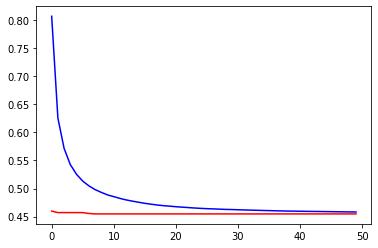

In [21]:
plt.plot(mean_fitness,'b-')
plt.plot(best_fitness, 'r-')

In [22]:
W = population[0].reshape(1,-1)
print(W)

[[0.09879247 0.99957259 0.80064673]]


In [23]:
# z = x.wt > 320*3, 1*3 > use on of the estimators
z_train = np.dot(X_train, W.T)
h_train = sigmoid(z_train)
pred_train = h_train > 0.5

print(np.mean(pred_train == y_train))

0.803125


In [24]:
z_test = np.dot(X_train, W.T)
h_test = sigmoid(z_test)
pred_test  = h_test  > 0.5

print(np.mean(pred_test  == y_test ))

0.803125
